# NYC's COVID-19 new daily counts

New cases, new hospitalizations, and new deaths over time

## 0. Import dependencies

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd

## 1. Read data

Data notes from the data source [https://github.com/nychealth/coronavirus-data]:

> This (`case-hosp-death.csv`) file includes daily counts of new confirmed cases, hospitalizations, and deaths:
> * Cases are by date of diagnosis
> * Hospitalizations are by date of admission
> * Deaths are by date of death
>
> Because of delays in reporting, the most recent data may be incomplete. Data shown currently will be updated in the future as new cases, hospitalizations, and deaths are reported.

In [2]:
update_str = 'as of Apr 3, 2020'
source_str = 'Sources: Data: nyc.gov/coronavirus - Plot: carlos-afonso.github.io/COVID-19'
#source_str = 'Data: nyc.gov/coronavirus - Plot: carlos-afonso.github.io/COVID-19'
#source_str = 'Data source: NYC Health: github.com/nychealth/coronavirus-data'

data_file = '../data/nychealth-coronavirus-data/case-hosp-death.csv'

df0 = pd.read_csv(data_file)

df = df0.copy()

df

,DATE_OF_INTEREST,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
0,3/2/20,1,3.0,NaN
1,3/3/20,2,3.0,NaN
2,3/4/20,10,5.0,NaN
3,3/5/20,2,4.0,NaN
4,3/6/20,8,5.0,NaN
5,3/7/20,13,9.0,NaN
6,3/8/20,20,12.0,NaN
7,3/9/20,53,24.0,NaN
8,3/10/20,71,38.0,NaN
9,3/11/20,156,56.0,1.0


## 2. Clean data

### 2.1. Rename columns

Renames the columns with names that are easier to work with.

In [3]:
# Show orignal column names
df0.columns

Index(['DATE_OF_INTEREST', 'NEW_COVID_CASE_COUNT', 'HOSPITALIZED_CASE_COUNT',
       'DEATH_COUNT'],
      dtype='object')

In [4]:
# Define dictionary to rename columns
col_rename_dict = {
    'DATE_OF_INTEREST'       : 'date',
    'NEW_COVID_CASE_COUNT'   : 'cases',
    'HOSPITALIZED_CASE_COUNT': 'hosps',
    'DEATH_COUNT'            : 'deaths'
}

# Rename columns
df.rename(columns=col_rename_dict, inplace=True)

# Show the last data rows
df.tail()

,date,cases,hosps,deaths
29,3/31/20,3473,787.0,254.0
30,4/1/20,3170,818.0,211.0
31,4/2/20,3477,547.0,197.0
32,4/3/20,1705,42.0,173.0
33,4/4/20,76,NaN,24.0


### 2.2. Delete last row

Usually the latest data entry (the latest day, the last data row) is very incomplete and the counts are very low, which can be misleading.

Therefore, it's better to exclude that last data row from the visualizations.

In [5]:
delete_last_row = True

# Drop the last data row
if delete_last_row: df.drop([len(df) - 1], inplace=True)

# Show the last data rows
df.tail()

,date,cases,hosps,deaths
28,3/30/20,4305,925.0,213.0
29,3/31/20,3473,787.0,254.0
30,4/1/20,3170,818.0,211.0
31,4/2/20,3477,547.0,197.0
32,4/3/20,1705,42.0,173.0


### 2.3. Create date labels

In [6]:
# Define a function to create the date labels to show in the plot
def date_labels(dates):
    
    # Formats: '%m/%d', '%m/%d/%y', "%#d\n%b", "%b %#d", "%#d\n%b\n%Y"
    
    first_label = dates[0].strftime("%#d\n%b")
    #first_label = dates[0].strftime('%#m/%#d')
    
    last_label = dates[len(dates)-1].strftime("%#d\n%b")
    #last_label = dates[len(dates)-1].strftime('%#m/%#d/%y')
    
    labels = [first_label]
    
    for i in range(1, len(dates) - 1):
        label = dates[i].strftime("%#d")
        #label = dates[i].strftime('%#m/%#d')
        if dates[i].month != dates[i-1].month:
            label = dates[i].strftime("%#d\n%b")
            #label = dates[i].strftime('%#m/%#d')
            correct_last_label = True
        labels.append(label)
    
    if correct_last_label:
        last_label = dates[len(dates)-1].strftime("%#d")
    
    labels.append(last_label)
    
    return labels


df['date_obj'] = df['date'].map(lambda x: datetime.strptime(x, '%m/%d/%y').date())

df['date_label'] = date_labels(df['date_obj'])

df

,date,cases,hosps,deaths,date_obj,date_label
0,3/2/20,1,3.0,NaN,2020-03-02,2\nMar
1,3/3/20,2,3.0,NaN,2020-03-03,3
2,3/4/20,10,5.0,NaN,2020-03-04,4
3,3/5/20,2,4.0,NaN,2020-03-05,5
4,3/6/20,8,5.0,NaN,2020-03-06,6
5,3/7/20,13,9.0,NaN,2020-03-07,7
6,3/8/20,20,12.0,NaN,2020-03-08,8
7,3/9/20,53,24.0,NaN,2020-03-09,9
8,3/10/20,71,38.0,NaN,2020-03-10,10
9,3/11/20,156,56.0,1.0,2020-03-11,11


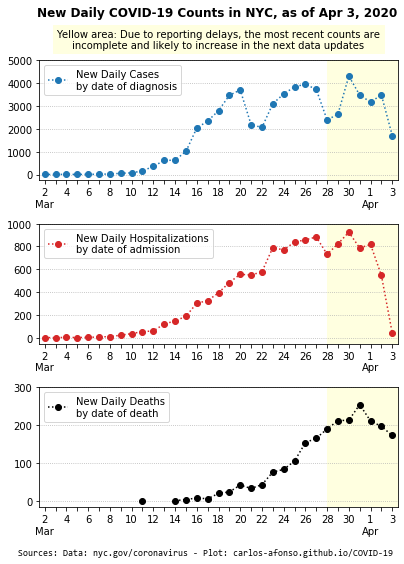

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(6, 8), sharex=False)

ax1.plot(df['date'], df['cases'], 'o:', color='C0', label='New Daily Cases\nby date of diagnosis')
ax2.plot(df['date'], df['hosps'], 'o:', color='C3', label='New Daily Hospitalizations\nby date of admission')
ax3.plot(df['date'], df['deaths'], 'o:', color='k', label='New Daily Deaths\nby date of death')

y1max = 5000
y2max = 1000
y3max = 300
s = -0.05
ax1.set_ylim(s*y1max, y1max)
ax2.set_ylim(s*y2max, y2max)
ax3.set_ylim(s*y3max, y3max)

warning_color = 'lightyellow' # 'ivory' 'whitesmoke'

title_str = 'New Daily COVID-19 Counts in NYC, ' + update_str
#title_str = 'NYC\'s New Daily COVID-19 Counts, ' + update_str
subtitle_str = 'Yellow area: Due to reporting delays, the most recent counts are\n' + \
               'incomplete and likely to increase in the next data updates'
fig.suptitle(title_str, fontsize=12, fontweight='bold', x=0.51)
ax1.set_title(subtitle_str, backgroundcolor=warning_color, fontsize=10, loc='center', pad=12)

x_labels = [df['date_label'].iloc[i] if i%2==0 else '' for i in range(len(df))]
x_labels[-1] = df['date_label'].iloc[-1]
if len(df)%2 == 0:
    x_labels[-2] = ''

for ax in (ax1, ax2, ax3):
    ax.grid(axis='y', linestyle=':')
    ax.legend(loc='upper left')
    ax.axvspan(len(df)-7, len(df), facecolor=warning_color)
    ax.set_xlim(-0.5, len(df)-0.5)
    ax.set_xticklabels(x_labels)

ax3.text(-2.5, -140, source_str, fontfamily='Consolas', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [81]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-new-daily-cases-hosps-deaths'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

In [9]:
df0.sum()

DATE_OF_INTEREST           3/2/203/3/203/4/203/5/203/6/203/7/203/8/203/9/...
NEW_COVID_CASE_COUNT                                                   60847
HOSPITALIZED_CASE_COUNT                                                12691
DEATH_COUNT                                                             2252
dtype: object

In [10]:
df.sum()

date          3/2/203/3/203/4/203/5/203/6/203/7/203/8/203/9/...
cases                                                     60771
hosps                                                     12691
deaths                                                     2228
date_label    2\nMar3456789101112131415161718192021222324252...
dtype: object

Total counts (from https://www1.nyc.gov/site/doh/covid/covid-19-data.page):

* Cases: 60,850
* Total hospitalized: 12,716
* Deaths: 2,254
* As of: 04/04/2020, 5:00pm